In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('data/main/charger.csv')
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["timestamp"] = df["timestamp"].dt.tz_convert(
    "Europe/Oslo"
)
gdf = df.groupby(['site_key', 'timestamp']).sum('value').reset_index()
gdf['site_key'].unique().size

584

In [25]:
gdf['day'] = gdf['timestamp'].dt.day
gdf['month'] = gdf['timestamp'].dt.month
gdf['year'] = gdf['timestamp'].dt.year

In [26]:
gdf1 = gdf.groupby(['site_key',  'year', 'month','day',])['value'].max().reset_index()
gdf2 = gdf1.groupby(['site_key', 'year','month', ])['value'].nlargest(3).reset_index()
gdf3 = gdf2.groupby(['site_key', 'year','month'])['value'].mean().reset_index()
capacity_steps = {
    "Trinn 1 (0-2)": 2,
    "Trinn 2 (2-5)": 5,
    "Trinn 3 (5-10)": 10,
    "Trinn 4 (10-15)": 15,
    "Trinn 5 (15-20)": 20,
    "Trinn 6 (20-25)": 25,
    "Trinn 7 (25-50)": 50,
    "Trinn 8 (50-75)": 75,
    "Trinn 9 (75-100)": 100,
    "Trinn 10 (100-)": float('inf'),
}

# use capacity_steps which has the lower limit of the capacity range as the key to get the value
gdf3['capacity'] = gdf3['value'].apply(lambda x: next((k for k, v in capacity_steps.items() if x < v), 100))

gdf3.to_csv('output.csv', index=False)

print(gdf3)

       site_key  year  month      value         capacity
0     24U4-G222  2024     12   7.563775   Trinn 3 (5-10)
1     24U4-G222  2025      1   7.526582   Trinn 3 (5-10)
2     28GD-L522  2024     12  17.863793  Trinn 5 (15-20)
3     28GD-L522  2025      1  11.406792  Trinn 4 (10-15)
4     28T4-7722  2024     12  24.219115  Trinn 6 (20-25)
...         ...   ...    ...        ...              ...
1159  ZXKY-B622  2025      1   2.626631    Trinn 2 (2-5)
1160  ZYY4-R522  2024     12  22.328309  Trinn 6 (20-25)
1161  ZYY4-R522  2025      1  29.587875  Trinn 7 (25-50)
1162  ZZUF-H222  2024     12  16.646768  Trinn 5 (15-20)
1163  ZZUF-H222  2025      1  11.481696  Trinn 4 (10-15)

[1164 rows x 5 columns]


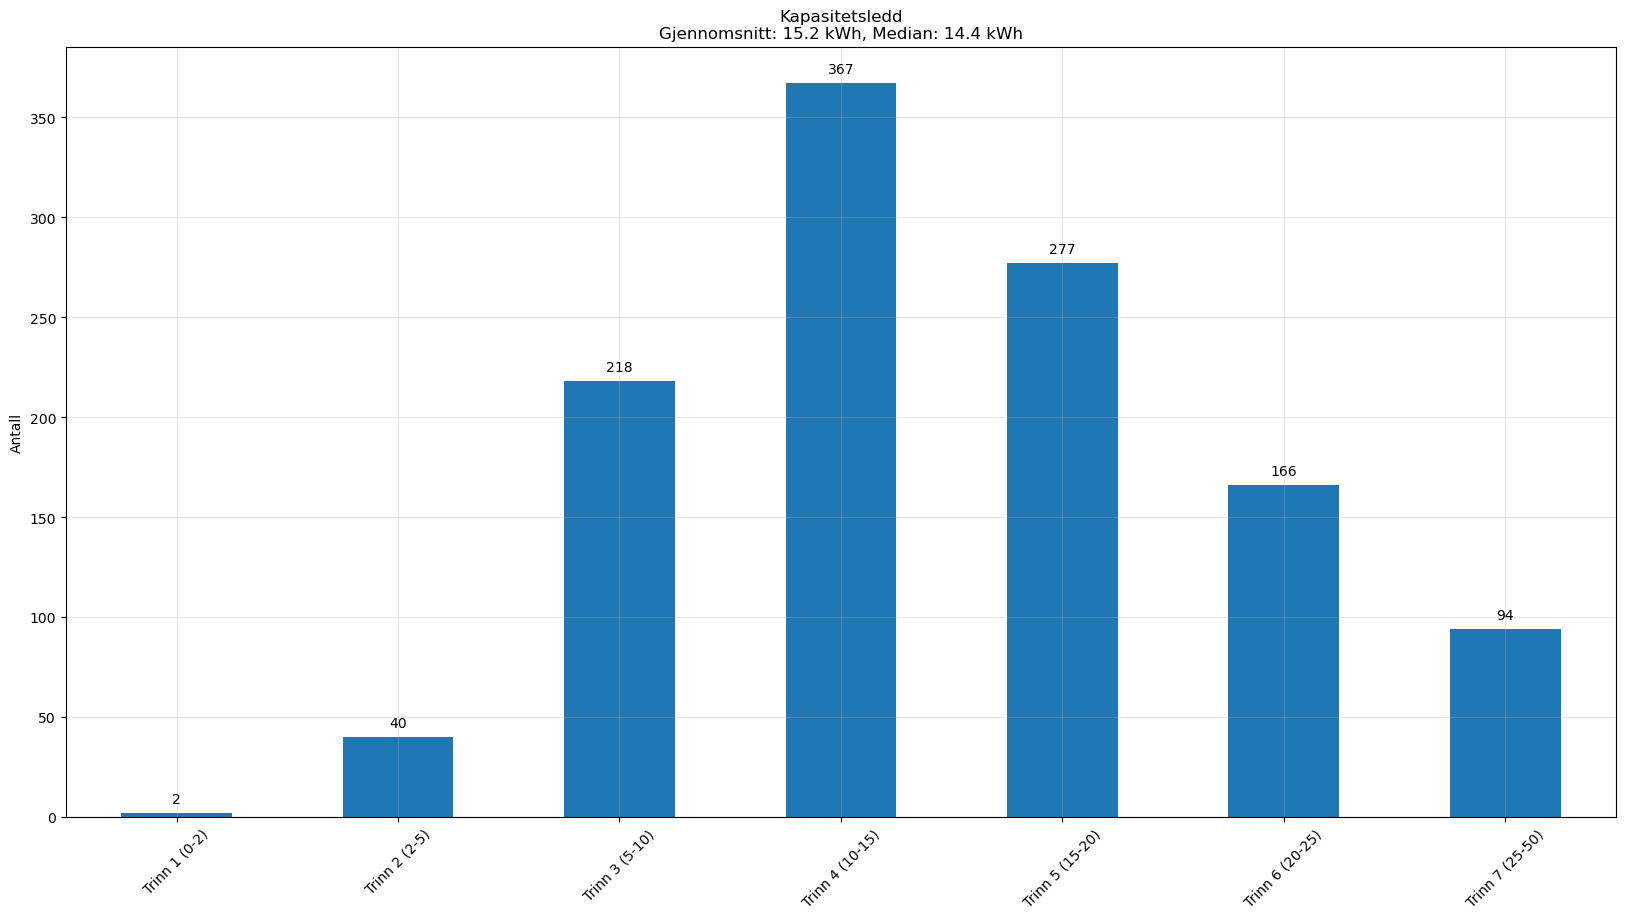

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

# Convert seconds to hours
x = gdf3["capacity"].groupby(gdf3["capacity"]).count()

# Plot histogram with improved parameters
x.plot(kind="bar", ax=ax)


# Add statistics to title
mean = gdf3["value"].mean()
median = gdf3["value"].median()
title = f"Kapasitetsledd\nGjennomsnitt: {mean:.1f} kWh, Median: {median:.1f} kWh"

ax.set_title(title)
ax.set_xlabel("")
# set value of bar on top of the bar
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 5, f"{i.get_height():.0f}", ha="center")

# Set labels
ax.set_ylabel("Antall")

# turn x axis labels to vertical
plt.xticks(rotation=45)

# Add grid for better readability
ax.grid(True, alpha=0.3)

plt.show()
